#### Analysis
Jack Krebsbach & Eli Edwards

In [9]:
import pandas as pd
import numpy as np
import text2emotion as te
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './outputs/temp/20231125143018.csv'
df = pd.read_csv(file_path)

In [3]:
df['word_count'] = df['lyop'].str.split().str.len()

In [25]:
df

,Unnamed: 0,email,full_name,lyop,invited_by,city_unstructured,bought_shoes,processed_text,sentiment,Country,Region,City,State,word_count
0,69,furtickbrandon81@gmail.com,Brandon Furtick,These shoes are amazing in every way from how ...,NaN,Duluth,True,These shoe amazing every way confident founder...,0.366667,NaN,NaN,NaN,Minnesota,23
1,146,gala12143@aol.com,Kendall Brannon,I am inspired my rhythm and music. I light my ...,NaN,Bacliff,True,I inspired rhythm music . I light path creativ...,0.400000,United States,NaN,NaN,Texas,18
2,176,kelvin943451798@gmail.com,dexen,YEA,NaN,NY,True,YEA,0.000000,United States,NaN,NaN,NaN,1
3,235,aaronjleeman46@gmail.com,Aaron,Creating my own sounds musically and exploring...,NaN,Leamington Spa,True,Creating sound musically exploring soundscapes,0.200000,England,West Midlands,NaN,NaN,8
4,247,finnlaccapone@gmail.com,Lucas Capone,I’m apart of a large car community where we ho...,NaN,Rockaway,True,I ’ apart large car community hold weekly show...,0.107143,NaN,NaN,NaN,NaN,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25372,26454,j.v.delcruz70120@gmail.com,Juan De La Cruz,I go through and trying new things as possible...,NaN,Menifee California,False,I go trying new thing possible keep looking di...,0.106061,NaN,NaN,NaN,NaN,52
25373,26455,djm3lla@gmail.com,Keven,I dj and I love being creative with new styles...,NaN,New York,False,I dj I love creative new style music,0.378788,NaN,NaN,NaN,NaN,12
25374,26457,mattd666@icloud.com,Matthew,"The people around me, they inspire me to be be...",NaN,Gloucester,False,"The people around , inspire better accomplish ...",0.500000,NaN,NaN,NaN,NaN,14
25375,26458,seniorbenefits001@gmail.com,Leonardo Garcia,Destined for greatness,NaN,"Orlando, Florida",False,Destined greatness,0.000000,NaN,NaN,NaN,NaN,3


In [9]:

# Sample data: replace this with your DataFrame column
documents = df.lyop

# Text preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(document):
    stop_free = " ".join([word for word in document.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in documents]    

# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.046*"like" + 0.038*"shoe" + 0.030*"love" + 0.027*"different" + 0.020*"look" + 0.016*"would" + 0.015*"want" + 0.015*"stand" + 0.013*"unique" + 0.013*"light"
Topic: 1 
Words: 0.042*"family" + 0.035*"day" + 0.025*"better" + 0.025*"every" + 0.023*"kid" + 0.022*"inspires" + 0.017*"best" + 0.016*"inspire" + 0.011*"step" + 0.011*"child"
Topic: 2 
Words: 0.038*"life" + 0.034*"work" + 0.028*"never" + 0.026*"hard" + 0.025*"keep" + 0.021*"always" + 0.016*"working" + 0.013*"going" + 0.013*"live" + 0.012*"get"
Topic: 3 
Words: 0.052*"music" + 0.047*"new" + 0.017*"i’m" + 0.015*"art" + 0.015*"business" + 0.013*"passion" + 0.013*"creating" + 0.013*"inspired" + 0.012*"im" + 0.012*"creative"
Topic: 4 
Words: 0.070*"path" + 0.066*"light" + 0.024*"people" + 0.024*"others" + 0.021*"inspires" + 0.019*"me" + 0.018*"make" + 0.018*"life" + 0.015*"way" + 0.011*"want"


In [4]:
for index, row in df.iterrows():
    clean_text = row['lyop'].encode('unicode_escape').decode('utf-8')
    # Get the emotion scores
    emotion_scores = te.get_emotion(clean_text)
    for emotion, score in emotion_scores.items():
        df.at[index, emotion] = score

In [5]:
df

,Unnamed: 0,email,full_name,lyop,invited_by,city_unstructured,bought_shoes,processed_text,sentiment,Country,Region,City,State,word_count,Happy,Angry,Surprise,Sad,Fear
0,69,furtickbrandon81@gmail.com,Brandon Furtick,These shoes are amazing in every way from how ...,NaN,Duluth,True,These shoe amazing every way confident founder...,0.366667,NaN,NaN,NaN,Minnesota,23,0.00,0.0,0.25,0.25,0.50
1,146,gala12143@aol.com,Kendall Brannon,I am inspired my rhythm and music. I light my ...,NaN,Bacliff,True,I inspired rhythm music . I light path creativ...,0.400000,United States,NaN,NaN,Texas,18,1.00,0.0,0.00,0.00,0.00
2,176,kelvin943451798@gmail.com,dexen,YEA,NaN,NY,True,YEA,0.000000,United States,NaN,NaN,NaN,1,0.00,0.0,0.00,0.00,1.00
3,235,aaronjleeman46@gmail.com,Aaron,Creating my own sounds musically and exploring...,NaN,Leamington Spa,True,Creating sound musically exploring soundscapes,0.200000,England,West Midlands,NaN,NaN,8,0.00,0.0,0.00,0.00,0.00
4,247,finnlaccapone@gmail.com,Lucas Capone,I’m apart of a large car community where we ho...,NaN,Rockaway,True,I ’ apart large car community hold weekly show...,0.107143,NaN,NaN,NaN,NaN,50,0.20,0.0,0.20,0.00,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25372,26454,j.v.delcruz70120@gmail.com,Juan De La Cruz,I go through and trying new things as possible...,NaN,Menifee California,False,I go trying new thing possible keep looking di...,0.106061,NaN,NaN,NaN,NaN,52,0.25,0.0,0.50,0.00,0.25
25373,26455,djm3lla@gmail.com,Keven,I dj and I love being creative with new styles...,NaN,New York,False,I dj I love creative new style music,0.378788,NaN,NaN,NaN,NaN,12,1.00,0.0,0.00,0.00,0.00
25374,26457,mattd666@icloud.com,Matthew,"The people around me, they inspire me to be be...",NaN,Gloucester,False,"The people around , inspire better accomplish ...",0.500000,NaN,NaN,NaN,NaN,14,1.00,0.0,0.00,0.00,0.00
25375,26458,seniorbenefits001@gmail.com,Leonardo Garcia,Destined for greatness,NaN,"Orlando, Florida",False,Destined greatness,0.000000,NaN,NaN,NaN,NaN,3,0.00,0.0,0.00,0.00,0.00


In [17]:

columns = ['sentiment','word_count', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear','bought_shoes']
#columns = ['sentiment','word_count','bought_shoes']
data = df[columns]

In [18]:
data

,sentiment,word_count,Happy,Angry,Surprise,Sad,Fear,bought_shoes
0,0.366667,23,0.00,0.0,0.25,0.25,0.50,True
1,0.400000,18,1.00,0.0,0.00,0.00,0.00,True
2,0.000000,1,0.00,0.0,0.00,0.00,1.00,True
3,0.200000,8,0.00,0.0,0.00,0.00,0.00,True
4,0.107143,50,0.20,0.0,0.20,0.00,0.60,True
...,...,...,...,...,...,...,...,...
25372,0.106061,52,0.25,0.0,0.50,0.00,0.25,False
25373,0.378788,12,1.00,0.0,0.00,0.00,0.00,False
25374,0.500000,14,1.00,0.0,0.00,0.00,0.00,False
25375,0.000000,3,0.00,0.0,0.00,0.00,0.00,False


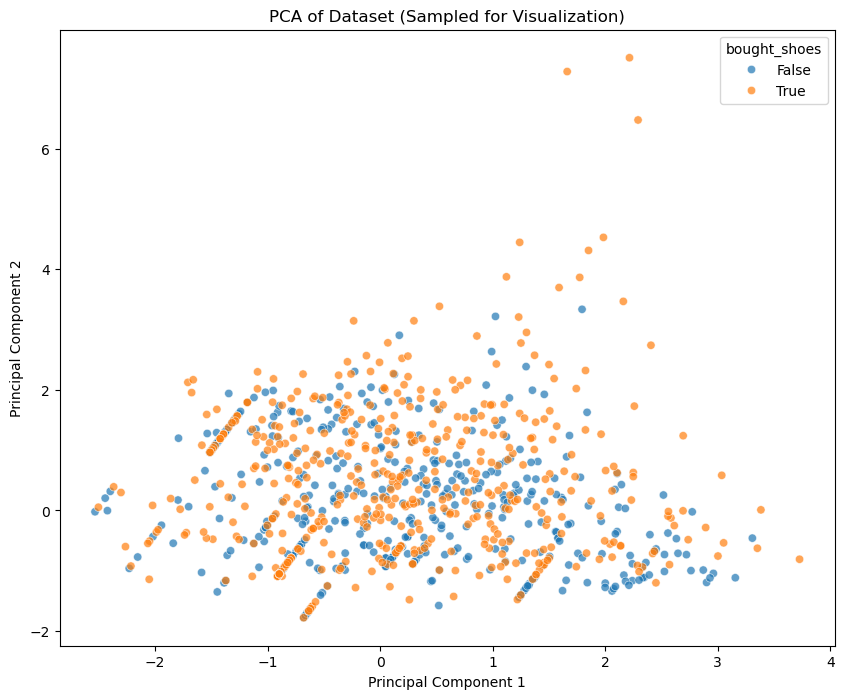

In [19]:
# Assuming df is your DataFrame
# Separate features and target
X = data.drop('bought_shoes', axis=1)
y = data['bought_shoes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_data = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Concatenate with the target variable
final_data = pd.concat([principal_data, y.reset_index(drop=True)], axis=1)

# Sample 100 from each class of 'bought_shoes' after PCA
sampled_pca_df = final_data.groupby('bought_shoes').apply(lambda x: x.sample(n=500)).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_pca_df, x='PC1', y='PC2', hue='bought_shoes', alpha=0.7)
plt.title('PCA of Dataset (Sampled for Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()